# Problem Statement
- Leveraging the customer data collected by Yulu consisting of the datetime, season, holiday, workingday,  temp, registered, windspeed, humidity and  count to understand the factors on which the demand for these shared electric cycles depends.
- Understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bike_sharing.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
df.shape

(10886, 12)

In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df.describe(include='object').T

,count,unique,top,freq
datetime,10886,10886,2011-01-01 00:00:00,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
category_variables = ['season','holiday', 'workingday', 'weather']
for i in category_variables:
    print('Count for each category of ', i)
    print(df[i].value_counts().sort_values(ascending=False))

Count for each category of  season
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
Count for each category of  holiday
0    10575
1      311
Name: holiday, dtype: int64
Count for each category of  workingday
1    7412
0    3474
Name: workingday, dtype: int64
Count for each category of  weather
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


In [8]:
# Checking Null value
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Outlier Detection

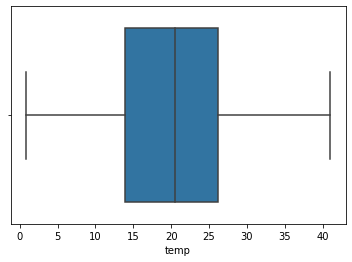

In [9]:
sns.boxplot(df['temp'])
plt.show()

<AxesSubplot:xlabel='humidity'>

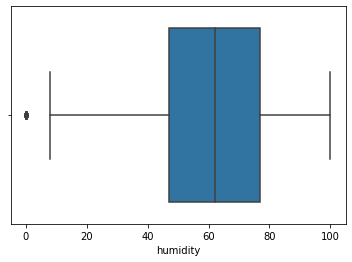

In [10]:
sns.boxplot(df['humidity'])

<AxesSubplot:xlabel='windspeed'>

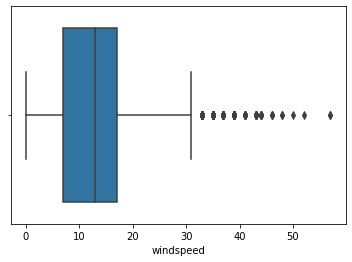

In [11]:
sns.boxplot(df['windspeed'])

windspeed has a lot of outliers.
### Outlier Treatment

In [12]:
q_25 = np.percentile(df['windspeed'], 25)
q_75 = np.percentile(df['windspeed'], 75)
iqr = (q_75 - q_25)
upperbound = q_75 + 1.5*iqr
lowerbound = q_25 - 1.5*iqr
de = df[(df['windspeed']>= lowerbound) & (df['windspeed']<= upperbound)]

#### % data lost in outlier removal

In [13]:

(len(df)-len(de))/len(df)*100

2.085247106375161

In [14]:
de.shape

(10659, 12)

In [15]:
de.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10659.000000,10659.000000,10659.000000,10659.000000,10659.000000,10659.000000,10659.000000,10659.000000,10659.000000,10659.000000,10659.000000
mean,2.522000,0.028614,0.680645,1.417112,20.268901,23.713577,62.214373,12.292752,36.020358,155.537480,191.557838
std,1.113455,0.166728,0.466248,0.631143,7.788440,8.443245,19.083557,7.441015,49.961301,151.105693,181.211409
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,35.500000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,11.001400,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,78.000000,16.997900,49.000000,223.000000,285.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,31.000900,367.000000,886.000000,977.000000


In [16]:
de.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10659 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10659 non-null  object 
 1   season      10659 non-null  int64  
 2   holiday     10659 non-null  int64  
 3   workingday  10659 non-null  int64  
 4   weather     10659 non-null  int64  
 5   temp        10659 non-null  float64
 6   atemp       10659 non-null  float64
 7   humidity    10659 non-null  int64  
 8   windspeed   10659 non-null  float64
 9   casual      10659 non-null  int64  
 10  registered  10659 non-null  int64  
 11  count       10659 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.1+ MB


### converting categorical attributes as 'category'

In [17]:
category_variables = ['season','holiday', 'workingday', 'weather']
for i in category_variables:
    de[i] = de[i].astype('category')

In [18]:
de['datetime'] = pd.to_datetime(de['datetime'])

In [19]:
de.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10659 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10659 non-null  datetime64[ns]
 1   season      10659 non-null  category      
 2   holiday     10659 non-null  category      
 3   workingday  10659 non-null  category      
 4   weather     10659 non-null  category      
 5   temp        10659 non-null  float64       
 6   atemp       10659 non-null  float64       
 7   humidity    10659 non-null  int64         
 8   windspeed   10659 non-null  float64       
 9   casual      10659 non-null  int64         
 10  registered  10659 non-null  int64         
 11  count       10659 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 791.7 KB


In [20]:
de.describe(include= 'category')

,season,holiday,workingday,weather
count,10659,10659,10659,10659
unique,4,2,2,4
top,4,0,1,1
freq,2711,10354,7255,7039


In [21]:
de.nunique()

datetime      10659
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         88
windspeed        16
casual          307
registered      728
count           819
dtype: int64

In [22]:
for i in category_variables:
    print('Unique value for category of ', i)
    print(de[i].unique().sort_values(ascending=False))

Unique value for category of  season
[4, 3, 2, 1]
Categories (4, int64): [1, 2, 3, 4]
Unique value for category of  holiday
[1, 0]
Categories (2, int64): [0, 1]
Unique value for category of  workingday
[1, 0]
Categories (2, int64): [0, 1]
Unique value for category of  weather
[4, 3, 2, 1]
Categories (4, int64): [1, 2, 3, 4]


In [23]:
for i in category_variables:
    print('Count for category of ', i)
    print(de[i].value_counts().sort_values(ascending=False))

Count for category of  season
4    2711
3    2708
2    2674
1    2566
Name: season, dtype: int64
Count for category of  holiday
0    10354
1      305
Name: holiday, dtype: int64
Count for category of  workingday
1    7255
0    3404
Name: workingday, dtype: int64
Count for category of  weather
1    7039
2    2795
3     824
4       1
Name: weather, dtype: int64


In [24]:
# value count in percentage
for i in category_variables:
    print('Count for each category of ', i)
    print(round(de[i].value_counts().sort_values(ascending=False)/len(de)*100, 2 ))

Count for each category of  season
4    25.43
3    25.41
2    25.09
1    24.07
Name: season, dtype: float64
Count for each category of  holiday
0    97.14
1     2.86
Name: holiday, dtype: float64
Count for each category of  workingday
1    68.06
0    31.94
Name: workingday, dtype: float64
Count for each category of  weather
1    66.04
2    26.22
3     7.73
4     0.01
Name: weather, dtype: float64


## Univariate analysis of Categorical Variables

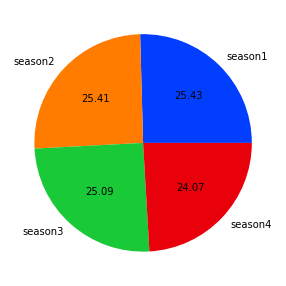

In [25]:
data = de['season'].value_counts()
label = ['season1','season2','season3','season4']
plt.figure(figsize=(8,5))
palette_color = sns.color_palette('bright')
plt.pie(data, autopct = '%.2f', labels = label, colors= palette_color)
plt.show()

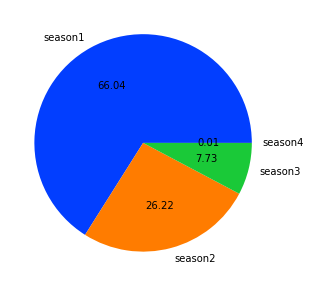

In [26]:
data = de['weather'].value_counts()

label = ['season1','season2','season3','season4']
plt.figure(figsize=(8,5))

palette_color = sns.color_palette('bright')
plt.pie(data, autopct = '%.2f', labels = label, colors= palette_color)
plt.show()

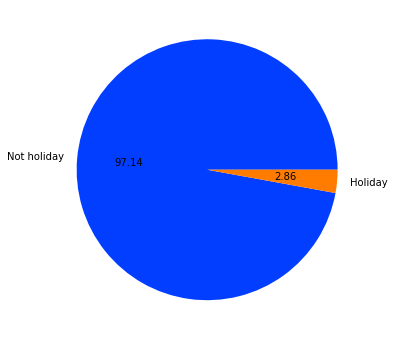

In [27]:
data = de['holiday'].value_counts()

label = ['Not holiday','Holiday']
plt.figure(figsize=(6,6))
palette_color = sns.color_palette('bright')
plt.pie(data, autopct = '%.2f', labels = label, colors= palette_color)
plt.show()

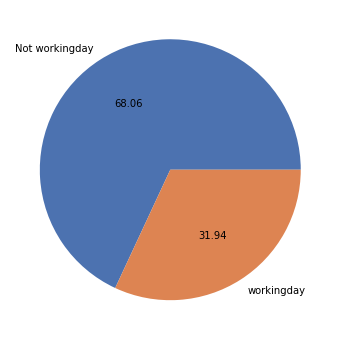

In [28]:
data = de['workingday'].value_counts()

label = ['Not workingday','workingday']
plt.figure(figsize=(6,6))
palette_color = sns.color_palette('deep')
plt.pie(data, autopct = '%.2f', labels = label, colors= palette_color)
plt.show()

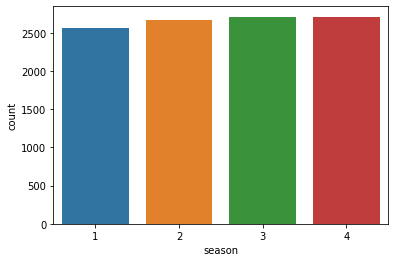

In [29]:
sns.countplot(de['season'])
plt.show()

All the season have almost same amount of data

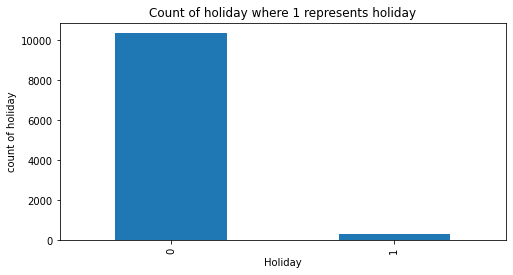

In [30]:
de['holiday'].value_counts().plot(kind= 'bar', figsize = (8,4), title = 'Count of holiday where 1 represents holiday', xlabel = 'Holiday', ylabel = 'count of holiday')
plt.show()

Very few holidays are there

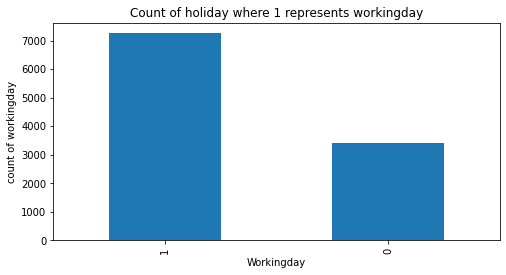

In [31]:
de['workingday'].value_counts().plot(kind= 'bar', figsize = (8,4), title = 'Count of holiday where 1 represents workingday', xlabel = 'Workingday', ylabel = 'count of workingday')
plt.show()

Working day is almost 2 times than non working day

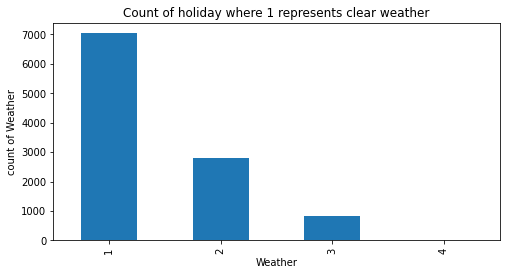

In [32]:
de['weather'].value_counts().plot(kind= 'bar', figsize = (8,4), title = 'Count of holiday where 1 represents clear weather', xlabel = 'Weather', ylabel = 'count of Weather')
plt.show()

Only 1 data is present for weather 4
Weather 1 is the most favorable weather

## Univariate analysis of Continuous Variables

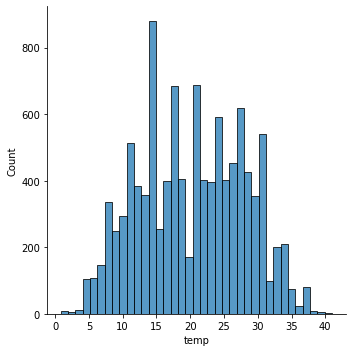

In [33]:
sns.displot(df['temp'])
plt.show()

Normal distrubution for temp and feeling temp

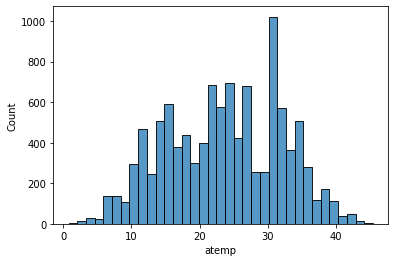

In [34]:
sns.histplot(df['atemp'])
plt.show()

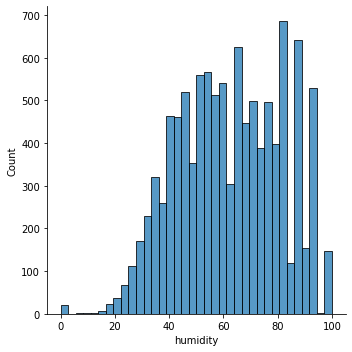

In [35]:
sns.displot((de['humidity']))
plt.show()

Humidity is genrally more than 40%

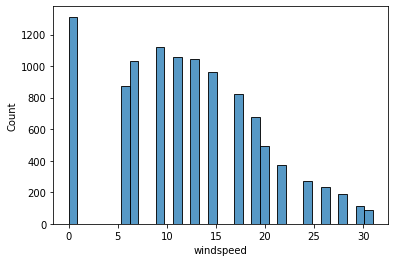

In [36]:
sns.histplot(de['windspeed'])
plt.show()

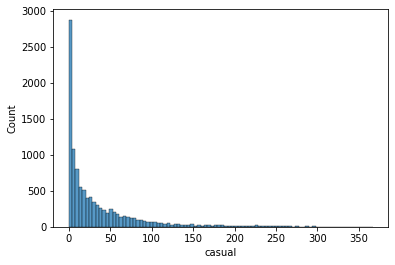

In [37]:
sns.histplot((de['casual']))
plt.show()

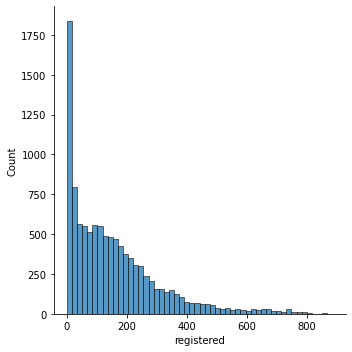

In [38]:
sns.displot(de['registered'])
plt.show()

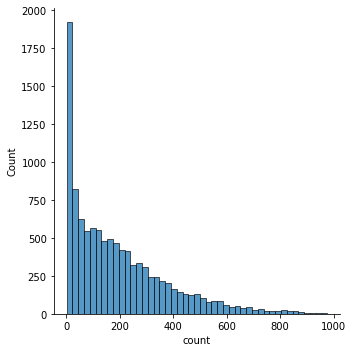

In [39]:
sns.displot(de['count'])
plt.show()

A significant number of Unregistered people are also using the bicycle

## Bivariate Analysis

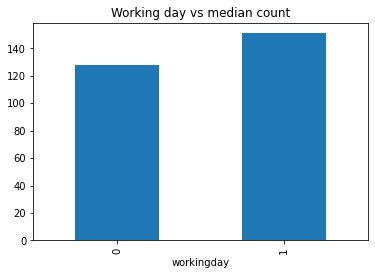

In [40]:
de.groupby(['workingday'])['count'].median().plot(kind= 'bar', title = 'Working day vs median count')
plt.show()

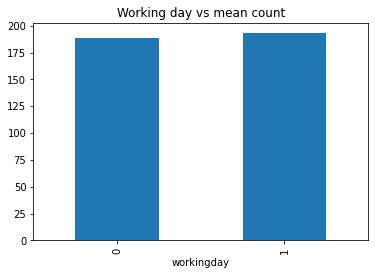

In [41]:

de.groupby(['workingday'])['count'].mean().plot(kind= 'bar', title = 'Working day vs mean count')
plt.show()

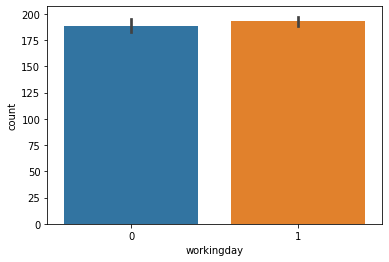

In [42]:
sns.barplot(de['workingday'], de['count'])
plt.show()

The mean of working day and non workingday is almost same

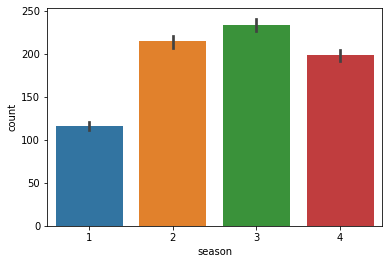

In [43]:
sns.barplot(de['season'], de['count'])
plt.show()

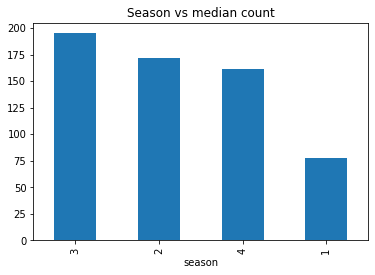

In [44]:
de.groupby(['season'])['count'].median().sort_values(ascending=False).plot(kind= 'bar', title = 'Season vs median count')
plt.show()

Maximum number of customer is using vehicle in season 3 (Fall).  
Minimum number of customer is using vehicle in season 1 (Spring).

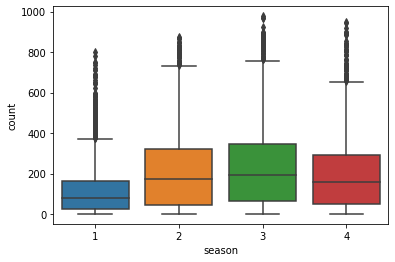

In [45]:
sns.boxplot(de['season'], de['count'])
plt.show()

Median for season3 is maximum and sesaon 1 is minimum

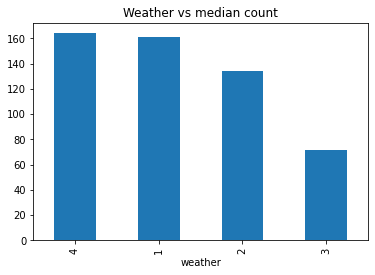

In [46]:
de.groupby(['weather'])['count'].median().sort_values(ascending=False).plot(kind= 'bar', title = 'Weather vs median count')
plt.show()

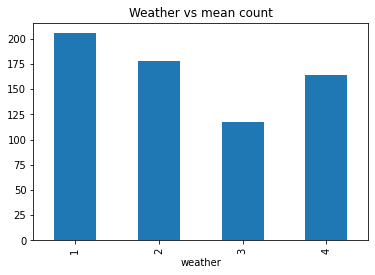

In [47]:
de.groupby(['weather'])['count'].mean().plot(kind= 'bar', title = 'Weather vs mean count')
plt.show()

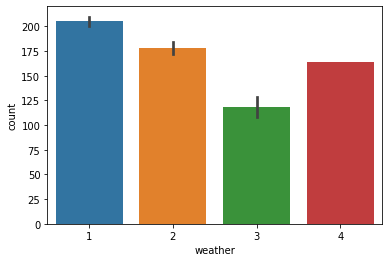

In [48]:
sns.barplot(de['weather'], de['count'])
plt.show()

Maximum number of customer is using vehicle in weather 1 (Clear, Few clouds, partly cloudy, partly cloudy).  
Minimum number of customer is using vehicle in weather 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds).

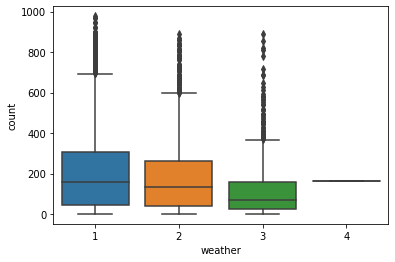

In [49]:
sns.boxplot(de['weather'], de['count'])
plt.show()

Median of weather1 is maximum and weather3 is minimum

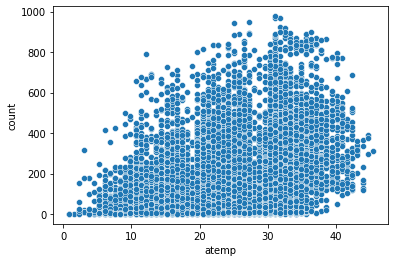

In [50]:
sns.scatterplot(de['atemp'], de['count'])
plt.show()

In [51]:
de['atemp'].describe()

count    10659.000000
mean        23.713577
std          8.443245
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

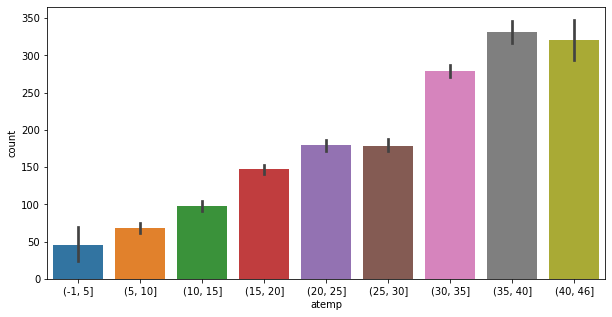

In [52]:
bins = [-1,5,10,15,20,25,30,35,40,46 ]
x = pd.cut(de['atemp'],bins=bins)
plt.figure(figsize= (10,5))
sns.barplot(x, de['count'])
plt.show()

As temp increases, more number of people are renting the cycle

In [53]:
de['humidity'].describe()

count    10659.000000
mean        62.214373
std         19.083557
min          0.000000
25%         47.000000
50%         62.000000
75%         78.000000
max        100.000000
Name: humidity, dtype: float64

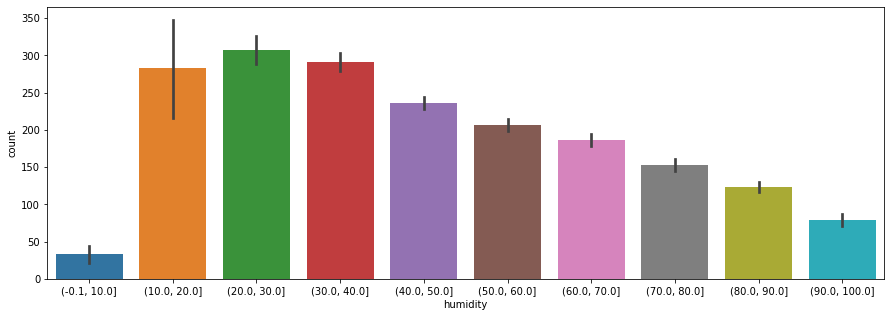

In [54]:

x = pd.cut(de['humidity'],bins=10)
plt.figure(figsize= (15,5))
sns.barplot(x, de['count'])
plt.show()

As humidity increases, people renting the cycle decreases

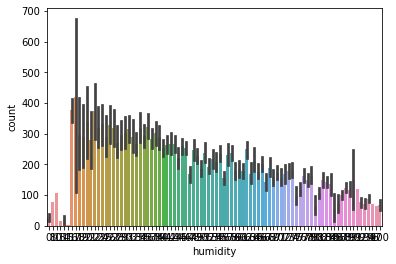

In [55]:
sns.barplot(de['humidity'], de['count'])
plt.show()

# Hypotesis Testing
## 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented.  
- Null Hypotesis, H0 : Working day has no effect on the number of cycle rented. Mean for working day = Mean for non working day
- Alternate Hypotesis, H1 : There is an effect of working day on number of cycle rented. Mean for working day != Mean for non working day
- Confindence Level = 95%
- significance level = 0.05
- Assumptions:  
1. Data is normaly distributed. 
2. Variance are equal. 
3. Two groups are independent of each other.

In [56]:
working = de[de['workingday'] ==1]['count'] 
nonworking = de[de['workingday'] ==0]['count'] 
print(working.describe()) 
nonworking.describe() 

count    7255.000000
mean      192.883391
std       184.636341
min         1.000000
25%        40.500000
50%       151.000000
75%       278.000000
max       977.000000
Name: count, dtype: float64


count    3404.000000
mean      188.732667
std       173.679393
min         1.000000
25%        43.750000
50%       128.000000
75%       304.000000
max       783.000000
Name: count, dtype: float64

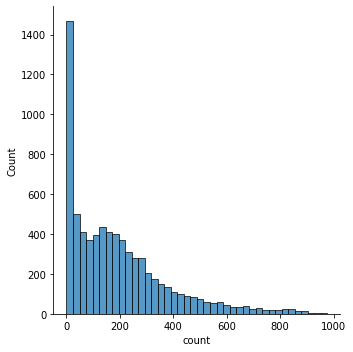

In [57]:
sns.displot(working)
plt.show()

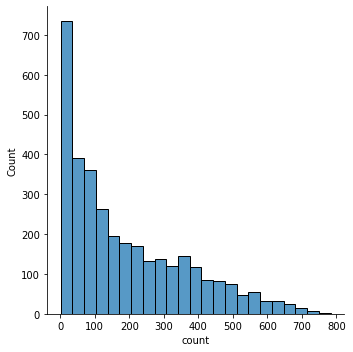

In [58]:
sns.displot((nonworking))
plt.show()

Since our data is not normally distributed we will first convert it to Normal distribution and then apply 2-sample t-test

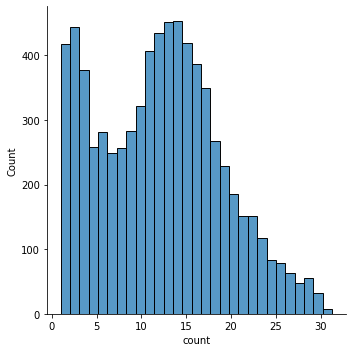

In [59]:

sns.displot(np.sqrt(working))
plt.show()

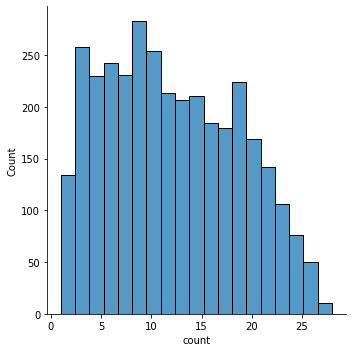

In [60]:
sns.displot(np.sqrt(nonworking))
plt.show()

In [61]:
working = np.sqrt(working)
nonworking = np.sqrt(nonworking)
working

47        2.236068
48        1.414214
49        1.000000
50        1.732051
51        5.477226
           ...    
10881    18.330303
10882    15.524175
10883    12.961481
10884    11.357817
10885     9.380832
Name: count, Length: 7255, dtype: float64

###  QQ plots to compare the distribution of continuous variables with standard distributions.

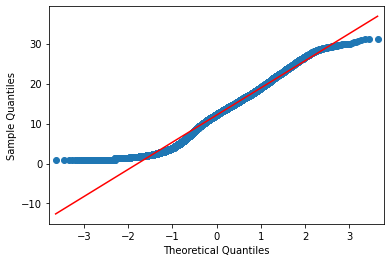

In [62]:
sm.qqplot(working, line='s')
plt.show()

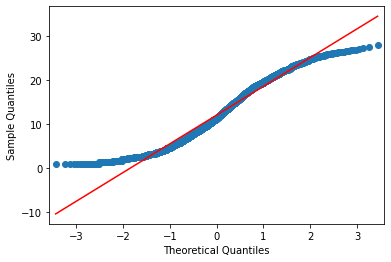

In [63]:
sm.qqplot(nonworking, line='s')
plt.show()

### Shapiro-Wilk test of normality
- Null Hypotesis, H0 : Sample is from the normal distributions.
- Alternate Hypotesis, H1 : Sample is not from the normal distributions.
- Confindence Level = 95%
- significance level = 0.05

In [64]:
stats.shapiro(working)

ShapiroResult(statistic=0.9733123183250427, pvalue=1.0503482834978697e-34)

In [65]:
stats.shapiro(nonworking)

ShapiroResult(statistic=0.9655737280845642, pvalue=8.797376429838735e-28)

since p-value < 0.05 , We reject the Null Hypotesis.  

It shows that the data is NOT normally distributed

### Checking equal variance assumpution using levene test
- Null Hypotesis, H0 : Variance for working and nonworking are equal.
- Alternate Hypotesis, H1 : Variance for working and nonworking are NOT equal.
- Confindence Level = 95%
- significance level = 0.05
- Assumptions:  
1. Data is normaly distributed. 
2. Groups are independent of each other.

In [66]:

stats.levene(working, nonworking)

LeveneResult(statistic=0.015292571411120457, pvalue=0.9015843322233752)

- Since pvalue > 0.05.
- We cannot reject the null hypotesis.
- Both varince are equal.

In [67]:
print(np.std(working)**2)
np.std(nonworking)**2

46.18395913438725


42.83590562534687

Since variance of the two groups are almost equal, we can apply t-test

In [68]:
stats.ttest_ind(working, nonworking)

Ttest_indResult(statistic=0.23776244701488938, pvalue=0.8120699172001911)

- Significance Level(0.05) < pvalue.
- Since p-value is not less than significance level, we donot reject the Null Hypotesis(H0).
- We can conclude that Working day has NO effect on the number of cycle rented.


## ANNOVA to check if No. of cycles rented is similar or different in different weather 
- Null Hypotesis, H0 : Weather has no effect on the number of cycle rented. Mean for weather1 = Mean for weather2 = Mean for weather3 = Mean for weather4
- Alternate Hypotesis, H1 : There is an effect of working day on number of cycle rented. Mean for weathers are not same
- Confindence Level = 95%
- significance level = 0.05
- Assumptions:  
1. Data is normaly distributed. 

3. Groups are independent of each other.

In [69]:

weather1 = de[de['weather']==1]['count']
weather2 = de[de['weather']==2]['count']
weather3 = de[de['weather']==3]['count']
weather4 = de[de['weather']==4]['count']
weather4

5631    164
Name: count, dtype: int64

Since weather4 has only 1 data, we will not consider for our test.

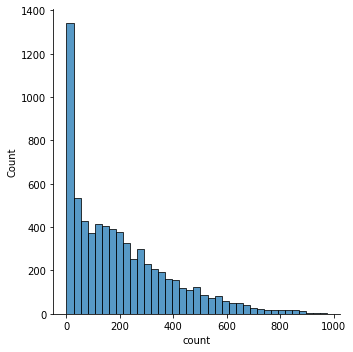

In [70]:
sns.displot(weather1)
plt.show()

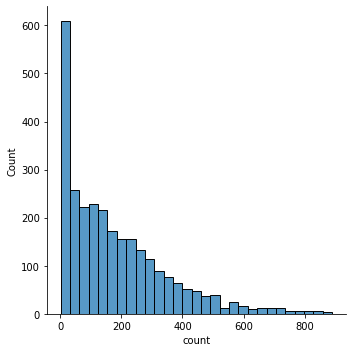

In [71]:
sns.displot(weather2)
plt.show()

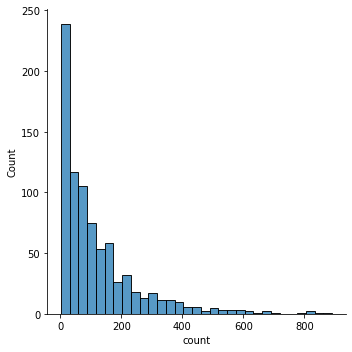

In [72]:
sns.displot(weather3)
plt.show()

Since the data is not normal we wil first Normalize it and then perform the ANOVA test

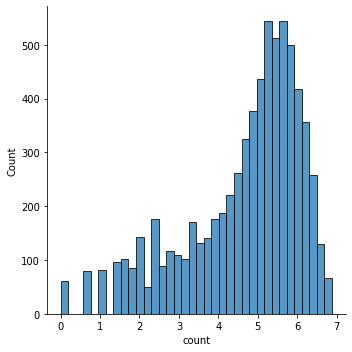

In [73]:
sns.displot(np.log(weather1))
plt.show()

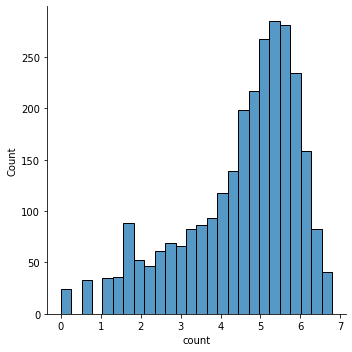

In [74]:
sns.displot(np.log(weather2))
plt.show()

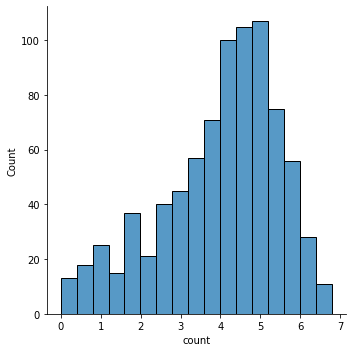

In [75]:
sns.displot(np.log(weather3))
plt.show()

In [76]:
weather1 = np.log(weather1)
weather2 = np.log(weather2)
weather3 = np.log(weather3)
weather1

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
           ...   
10881    5.817111
10882    5.484797
10883    5.123964
10884    4.859812
10885    4.477337
Name: count, Length: 7039, dtype: float64

In [77]:
stats.f_oneway(weather1, weather2, weather3)

F_onewayResult(statistic=71.88057216090351, pvalue=9.803624041522253e-32)

- Significance Level(0.05) > pvalue.
- Since p-value is less than significance level, we reject the Null Hypotesis(H0).
- We can conclude that Weather has effect on the number of cycle rented.


## ANNOVA to check if No. of cycles rented is similar or different in different Season 
- Null Hypotesis, H0 : Season has no effect on the number of cycle rented. Mean for Season1 = Mean for Season2 = Mean for Season3 = Mean for Season4
- Alternate Hypotesis, H1 : There is an effect of working day on number of cycle rented. Mean for Seasons are not same
- Confindence Level = 95%
- significance level = 0.05
- Assumptions:  
1. Data is normaly distributed. 

3. Groups are independent of each other.

In [78]:
season1 = de[de['season']==1]['count']
season2 = de[de['season']==2]['count']
season3 = de[de['season']==3]['count']
season4 = de[de['season']==4]['count']
season4

4055     130
4056      58
4057      67
4058      25
4059       8
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 2711, dtype: int64

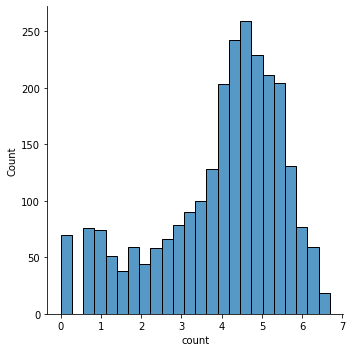

In [79]:
sns.displot(np.log(season1))
plt.show()

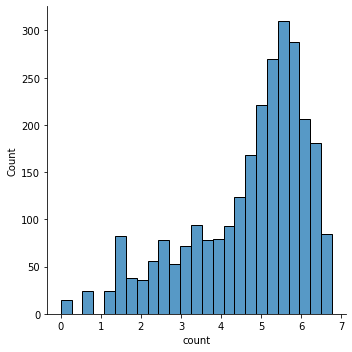

In [80]:
sns.displot(np.log(season2))
plt.show()

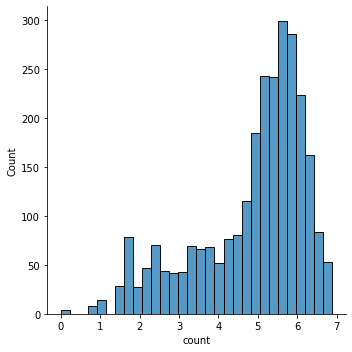

In [81]:
sns.displot(np.log(season3))
plt.show()

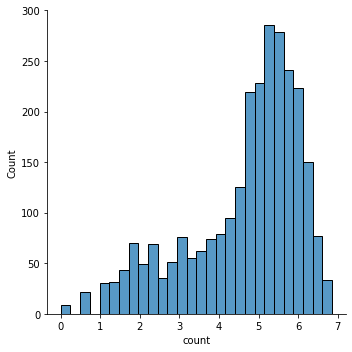

In [82]:
sns.displot(np.log(season4))
plt.show()

In [83]:
season1 = np.log(season1)
season2 = np.log(season2)
season3 = np.log(season3)
season4 = np.log(season4)
season4

4055     4.867534
4056     4.060443
4057     4.204693
4058     3.218876
4059     2.079442
           ...   
10881    5.817111
10882    5.484797
10883    5.123964
10884    4.859812
10885    4.477337
Name: count, Length: 2711, dtype: float64

In [84]:
stats.f_oneway(season1, season2, season3, season4)

F_onewayResult(statistic=188.33446434554708, pvalue=5.259257064220231e-119)

- Significance Level(0.05) > pvalue.
- Since p-value is less than significance level, we reject the Null Hypotesis(H0).
- We can conclude that Season has effect on the number of cycle rented.

## Chi-square test of Independence to check if Weather is dependent on the season
- Null Hypotesis, H0 : Weather is **Independent** on the season. 
- Alternate Hypotesis, H1 : Weather is **Dependent** on the season.
- Confindence Level = 95%
- significance level = 0.05
- Assumptions:  

1. Two groups are independent of each other.
2. Both groups are categorical variables

In [85]:
data1 = de[de['weather'] != 4]['weather']
data1
data2 = de[de['weather']!= 4]['season']
data2

0        1
1        1
2        1
3        1
4        1
        ..
10881    4
10882    4
10883    4
10884    4
10885    4
Name: season, Length: 10658, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [86]:

contengency_table = pd.crosstab(data1, data2)
contengency_table

season,1,2,3,4
weather,,,,
1,1662,1764,1921,1692
2,699,696,599,801
3,204,214,188,218


In [87]:

stat, p, dof, expected = stats.chi2_contingency(contengency_table)
p


8.740669492110389e-09

- Significance Level(0.05) > pvalue.
- Since p-value is less than significance level, we reject the Null Hypotesis(H0).
- We can conclude that Weather is **Dependent** on the season


# Insights & Recommendation

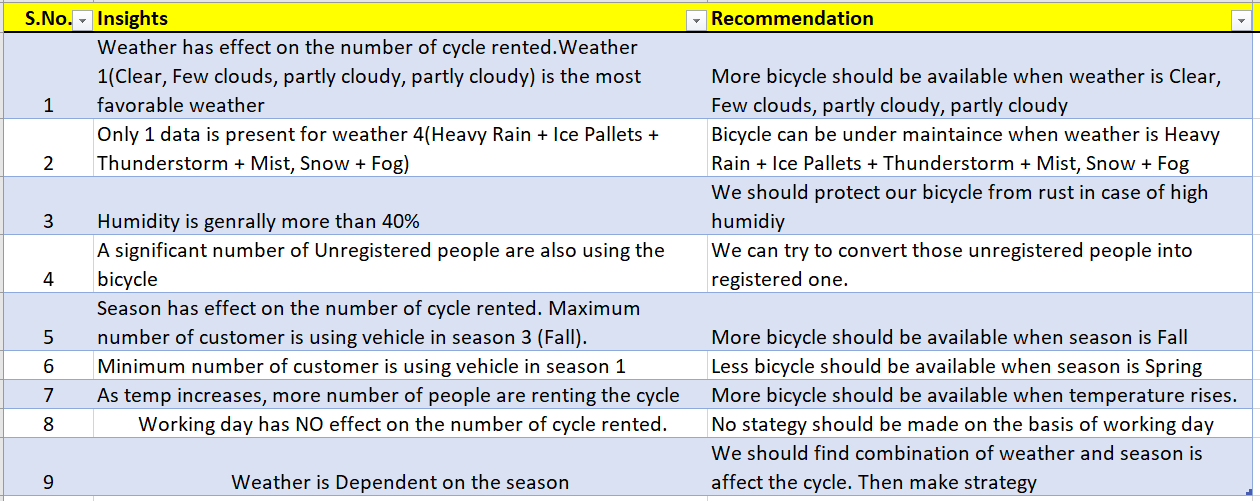